In [1]:
import os # operating system
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
# importing necessary libraries
from sklearn import datasets
from sklearn.metrics import confusion_matrix


In [2]:
data1 = pd.read_excel("oct.xlsx",sheet_name = "Sheet1")

In [3]:
data = data1

In [4]:
data.head()

,LATEST_ASG_EFF_STRT_DATE,AIN,AGE,GENDER,ETHNIC_ORIGIN_old,RACE,ADJ_SVC_DATE_OR_LAT_HIRE_DATE,Location Country,EMPLOYMENT_CATEGORY,ASSIGNMENT_STATUS,...,YEARS_OF_SERVICE,PERFORMANCE_YEAR,PERFORMANCE_RATING,TENURE_GROUP,REGION,PERFORMANCE_RATING_CHI2,EMPLOYEMENT_TYPE,JOB_GROUP_NAME_v1,ORGANIZATION_TYPE,ETHNIC_ORIGIN
0,31-OCT-2020,29,22.50,Female,White,NaN,27-NOV-2016,NaN,Fulltime-Regular,Terminate Assignment,...,3.9,2020,3,1 to 4.9 years,US,Meets Expection,Fulltime-Regular,Stores,Stores,White
1,31-OCT-2020,30,39.08,Male,Black or African American,NaN,03-FEB-2020,NaN,Fulltime-Regular,Terminate Assignment,...,0.7,2020,3,Less than 1 year,US,Meets Expection,Fulltime-Regular,Stores,Stores,Black or African American
2,31-OCT-2020,31,48.93,Male,White,NaN,25-JUN-2013,NaN,Fulltime-Regular,Terminate Assignment,...,7.3,2020,4,5 to 9.9 years,US,High,Fulltime-Regular,DC/FC/PC,DC/FC/PC,White
3,31-OCT-2020,32,23.64,Male,Black or African American,NaN,14-OCT-2017,NaN,Parttime-Regular,Terminate Assignment,...,3.0,2020,3,1 to 4.9 years,US,Meets Expection,Parttime-Regular,Stores,Stores,Black or African American
4,31-OCT-2020,33,71.93,Female,Asian,NaN,19-MAR-2014,NaN,Parttime-Regular,Terminate Assignment,...,12.4,2020,3,10 to 19.9 years,US,Meets Expection,Parttime-Regular,Stores,Stores,Asian


In [5]:
pd.set_option('display.max_columns', None)
data.head() # shape 572669 * 29
#pd.set_option('display.max_rows', None)


,LATEST_ASG_EFF_STRT_DATE,AIN,AGE,GENDER,ETHNIC_ORIGIN_old,RACE,ADJ_SVC_DATE_OR_LAT_HIRE_DATE,Location Country,EMPLOYMENT_CATEGORY,ASSIGNMENT_STATUS,COUNTRY,CITY,DIVISION,INTERM_PARENT_DIVISION,ORG_TYP,PEOPLE_GROUP_NAME,ORGANIZATION_NAME,Job Title,JOB_LEVEL_DESC,YEARS_OF_SERVICE,PERFORMANCE_YEAR,PERFORMANCE_RATING,TENURE_GROUP,REGION,PERFORMANCE_RATING_CHI2,EMPLOYEMENT_TYPE,JOB_GROUP_NAME_v1,ORGANIZATION_TYPE,ETHNIC_ORIGIN
0,31-OCT-2020,29,22.50,Female,White,NaN,27-NOV-2016,NaN,Fulltime-Regular,Terminate Assignment,US,El Cajon,HomeGoods,NaN,STORE,Stores,HomeGoods Store 0562,Backroom Coor,Coordinator,3.9,2020,3,1 to 4.9 years,US,Meets Expection,Fulltime-Regular,Stores,Stores,White
1,31-OCT-2020,30,39.08,Male,Black or African American,NaN,03-FEB-2020,NaN,Fulltime-Regular,Terminate Assignment,US,Carbondale,HomeGoods,NaN,STORE,Stores,HomeGoods Store 1054,Backroom Coor,Coordinator,0.7,2020,3,Less than 1 year,US,Meets Expection,Fulltime-Regular,Stores,Stores,Black or African American
2,31-OCT-2020,31,48.93,Male,White,NaN,25-JUN-2013,NaN,Fulltime-Regular,Terminate Assignment,US,Brownsburg,HomeGoods,NaN,DISTRIBUTION CENTER,Distribution Services,HomeGoods Distribution Center Brownsburg,D/C Supv,Supervisor,7.3,2020,4,5 to 9.9 years,US,High,Fulltime-Regular,DC/FC/PC,DC/FC/PC,White
3,31-OCT-2020,32,23.64,Male,Black or African American,NaN,14-OCT-2017,NaN,Parttime-Regular,Terminate Assignment,US,Pembroke Pines,HomeGoods,NaN,STORE,Stores,HomeGoods Store 0194,Merchandise Associate,Associate,3.0,2020,3,1 to 4.9 years,US,Meets Expection,Parttime-Regular,Stores,Stores,Black or African American
4,31-OCT-2020,33,71.93,Female,Asian,NaN,19-MAR-2014,NaN,Parttime-Regular,Terminate Assignment,US,Wheaton,HomeGoods,NaN,STORE,Stores,HomeGoods Store 0316,Merchandise Associate,Associate,12.4,2020,3,10 to 19.9 years,US,Meets Expection,Parttime-Regular,Stores,Stores,Asian


**Used Pandas Profiling to check the distribution of the Variables**

In [6]:
data.columns

Index(['LATEST_ASG_EFF_STRT_DATE', 'AIN', 'AGE', 'GENDER', 'ETHNIC_ORIGIN_old',
       'RACE', 'ADJ_SVC_DATE_OR_LAT_HIRE_DATE', 'Location Country',
       'EMPLOYMENT_CATEGORY', 'ASSIGNMENT_STATUS', 'COUNTRY', 'CITY',
       'DIVISION', 'INTERM_PARENT_DIVISION', 'ORG_TYP', 'PEOPLE_GROUP_NAME',
       'ORGANIZATION_NAME', 'Job Title', 'JOB_LEVEL_DESC', 'YEARS_OF_SERVICE',
       'PERFORMANCE_YEAR', 'PERFORMANCE_RATING', 'TENURE_GROUP', 'REGION',
       'PERFORMANCE_RATING_CHI2', 'EMPLOYEMENT_TYPE', 'JOB_GROUP_NAME_v1',
       'ORGANIZATION_TYPE', 'ETHNIC_ORIGIN'],
      dtype='object')

In [9]:
data["PERFORMANCE_YEAR"].unique()

array([2020, 2019, 2018], dtype=int64)

In [8]:
data = data[data["PERFORMANCE_YEAR"]!=2021]

In [10]:
data = data[data["REGION"]=='US']# FIlter

In [11]:
data.shape

(434270, 29)

**Imputing the variables usingt K nearest neighbours**

In [ ]:
# import numpy as np
# from sklearn.impute import KNNImputer
# imputer = KNNImputer(n_neighbors=2, weights="uniform")
# imputer.fit(data)
# # transform the dataset
# data = imputer.transform(data)
# #data = pd.DataFrame(data)

In [12]:
data = data.drop(['LATEST_ASG_EFF_STRT_DATE', 'ETHNIC_ORIGIN_old','AIN',
       'RACE', 'ADJ_SVC_DATE_OR_LAT_HIRE_DATE', 'Location Country','ORG_TYP',
       'ASSIGNMENT_STATUS', 'COUNTRY', 'CITY',
       'INTERM_PARENT_DIVISION',  'PEOPLE_GROUP_NAME','EMPLOYEMENT_TYPE',
       'ORGANIZATION_NAME', 'Job Title', 'YEARS_OF_SERVICE',
         'TENURE_GROUP','GENDER'],axis =1)

In [13]:
data = data.drop(['PERFORMANCE_RATING'],axis =1)

In [14]:
data.columns

Index(['AGE', 'EMPLOYMENT_CATEGORY', 'DIVISION', 'JOB_LEVEL_DESC',
       'PERFORMANCE_YEAR', 'REGION', 'PERFORMANCE_RATING_CHI2',
       'JOB_GROUP_NAME_v1', 'ORGANIZATION_TYPE', 'ETHNIC_ORIGIN'],
      dtype='object')

In [15]:
data.head()

,AGE,EMPLOYMENT_CATEGORY,DIVISION,JOB_LEVEL_DESC,PERFORMANCE_YEAR,REGION,PERFORMANCE_RATING_CHI2,JOB_GROUP_NAME_v1,ORGANIZATION_TYPE,ETHNIC_ORIGIN
0,22.50,Fulltime-Regular,HomeGoods,Coordinator,2020,US,Meets Expection,Stores,Stores,White
1,39.08,Fulltime-Regular,HomeGoods,Coordinator,2020,US,Meets Expection,Stores,Stores,Black or African American
2,48.93,Fulltime-Regular,HomeGoods,Supervisor,2020,US,High,DC/FC/PC,DC/FC/PC,White
3,23.64,Parttime-Regular,HomeGoods,Associate,2020,US,Meets Expection,Stores,Stores,Black or African American
4,71.93,Parttime-Regular,HomeGoods,Associate,2020,US,Meets Expection,Stores,Stores,Asian


In [16]:
data.describe()

,AGE,PERFORMANCE_YEAR
count,434270.000000,434270.000000
mean,42.236452,2019.011479
std,17.309872,0.801748
min,17.250000,2018.000000
25%,25.280000,2018.000000
50%,40.660000,2019.000000
75%,57.160000,2020.000000
max,96.230000,2020.000000


In [20]:
data['PERFORMANCE_RATING_CHI2'].unique()

array([1, 2, 0], dtype=int64)

In [19]:
df_div_a=['Meets Expection','High', 'Low']
df_div_b=[1,2,0]
data.PERFORMANCE_RATING_CHI2.replace(      df_div_a,     df_div_b,    inplace=True)

In [22]:
data.columns

Index(['AGE', 'EMPLOYMENT_CATEGORY', 'DIVISION', 'JOB_LEVEL_DESC',
       'PERFORMANCE_YEAR', 'REGION', 'PERFORMANCE_RATING_CHI2',
       'JOB_GROUP_NAME_v1', 'ORGANIZATION_TYPE', 'ETHNIC_ORIGIN'],
      dtype='object')

**Treating Categorical variables**

In [21]:
cat_vars=['ETHNIC_ORIGIN', 'EMPLOYMENT_CATEGORY', 'DIVISION', 'JOB_LEVEL_DESC',
       'PERFORMANCE_YEAR', 'REGION',
        'JOB_GROUP_NAME_v1', 'ORGANIZATION_TYPE']

In [26]:
data["ETHNIC_ORIGIN"].unique()

array(['White', 'Black or African American', 'Asian',
       'Hispanic or Latino of any race', 'Two or More Races',
       'Not Applicable', 'Native Hawaiian or Other Pacific',
       'American Indian or Alaskan Native'], dtype=object)

In [34]:
data.columns.values.tolist()

['AGE',
 'EMPLOYMENT_CATEGORY',
 'DIVISION',
 'JOB_LEVEL_DESC',
 'PERFORMANCE_YEAR',
 'REGION',
 'PERFORMANCE_RATING_CHI2',
 'JOB_GROUP_NAME_v1',
 'ORGANIZATION_TYPE',
 'ETHNIC_ORIGIN',
 'ETHNIC_ORIGIN_American Indian or Alaskan Native',
 'ETHNIC_ORIGIN_Asian',
 'ETHNIC_ORIGIN_Black or African American',
 'ETHNIC_ORIGIN_Hispanic or Latino of any race',
 'ETHNIC_ORIGIN_Native Hawaiian or Other Pacific',
 'ETHNIC_ORIGIN_Not Applicable',
 'ETHNIC_ORIGIN_Two or More Races',
 'ETHNIC_ORIGIN_White',
 'EMPLOYMENT_CATEGORY_Fulltime-Regular',
 'EMPLOYMENT_CATEGORY_Global Secondment',
 'EMPLOYMENT_CATEGORY_OnCall-PT-DistCtr Only',
 'EMPLOYMENT_CATEGORY_Parttime-Regular',
 'DIVISION_Digital',
 'DIVISION_HomeGoods',
 'DIVISION_Marmaxx',
 'DIVISION_No Parent Division',
 'DIVISION_TJX Corporate',
 'JOB_LEVEL_DESC_Assistant Manager',
 'JOB_LEVEL_DESC_Assistant Vice President Director',
 'JOB_LEVEL_DESC_Associate',
 'JOB_LEVEL_DESC_Buyer III',
 'JOB_LEVEL_DESC_Coordinator',
 'JOB_LEVEL_DESC_Executive 

In [35]:
[i for i in data_vars if i not in cat_vars]

['AGE',
 'PERFORMANCE_RATING_CHI2',
 'ETHNIC_ORIGIN_American Indian or Alaskan Native',
 'ETHNIC_ORIGIN_Asian',
 'ETHNIC_ORIGIN_Black or African American',
 'ETHNIC_ORIGIN_Hispanic or Latino of any race',
 'ETHNIC_ORIGIN_Native Hawaiian or Other Pacific',
 'ETHNIC_ORIGIN_Not Applicable',
 'ETHNIC_ORIGIN_Two or More Races',
 'ETHNIC_ORIGIN_White',
 'EMPLOYMENT_CATEGORY_Fulltime-Regular',
 'EMPLOYMENT_CATEGORY_Global Secondment',
 'EMPLOYMENT_CATEGORY_OnCall-PT-DistCtr Only',
 'EMPLOYMENT_CATEGORY_Parttime-Regular',
 'DIVISION_Digital',
 'DIVISION_HomeGoods',
 'DIVISION_Marmaxx',
 'DIVISION_No Parent Division',
 'DIVISION_TJX Corporate',
 'JOB_LEVEL_DESC_Assistant Manager',
 'JOB_LEVEL_DESC_Assistant Vice President Director',
 'JOB_LEVEL_DESC_Associate',
 'JOB_LEVEL_DESC_Buyer III',
 'JOB_LEVEL_DESC_Coordinator',
 'JOB_LEVEL_DESC_Executive Vice President',
 'JOB_LEVEL_DESC_Manager',
 'JOB_LEVEL_DESC_Manager of',
 'JOB_LEVEL_DESC_President',
 'JOB_LEVEL_DESC_Senior Executive Vice Presiden

In [36]:
l = []
for i in data_vars:
    if i not in cat_vars:
        l.append(i)

In [38]:
l

['AGE',
 'PERFORMANCE_RATING_CHI2',
 'ETHNIC_ORIGIN_American Indian or Alaskan Native',
 'ETHNIC_ORIGIN_Asian',
 'ETHNIC_ORIGIN_Black or African American',
 'ETHNIC_ORIGIN_Hispanic or Latino of any race',
 'ETHNIC_ORIGIN_Native Hawaiian or Other Pacific',
 'ETHNIC_ORIGIN_Not Applicable',
 'ETHNIC_ORIGIN_Two or More Races',
 'ETHNIC_ORIGIN_White',
 'EMPLOYMENT_CATEGORY_Fulltime-Regular',
 'EMPLOYMENT_CATEGORY_Global Secondment',
 'EMPLOYMENT_CATEGORY_OnCall-PT-DistCtr Only',
 'EMPLOYMENT_CATEGORY_Parttime-Regular',
 'DIVISION_Digital',
 'DIVISION_HomeGoods',
 'DIVISION_Marmaxx',
 'DIVISION_No Parent Division',
 'DIVISION_TJX Corporate',
 'JOB_LEVEL_DESC_Assistant Manager',
 'JOB_LEVEL_DESC_Assistant Vice President Director',
 'JOB_LEVEL_DESC_Associate',
 'JOB_LEVEL_DESC_Buyer III',
 'JOB_LEVEL_DESC_Coordinator',
 'JOB_LEVEL_DESC_Executive Vice President',
 'JOB_LEVEL_DESC_Manager',
 'JOB_LEVEL_DESC_Manager of',
 'JOB_LEVEL_DESC_President',
 'JOB_LEVEL_DESC_Senior Executive Vice Presiden

In [31]:
cat_vars=['ETHNIC_ORIGIN', 'EMPLOYMENT_CATEGORY', 'DIVISION', 'JOB_LEVEL_DESC',
       'PERFORMANCE_YEAR', 'REGION', 
        'JOB_GROUP_NAME_v1', 'ORGANIZATION_TYPE']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [39]:
print(to_keep)

['AGE', 'PERFORMANCE_RATING_CHI2', 'ETHNIC_ORIGIN_American Indian or Alaskan Native', 'ETHNIC_ORIGIN_Asian', 'ETHNIC_ORIGIN_Black or African American', 'ETHNIC_ORIGIN_Hispanic or Latino of any race', 'ETHNIC_ORIGIN_Native Hawaiian or Other Pacific', 'ETHNIC_ORIGIN_Not Applicable', 'ETHNIC_ORIGIN_Two or More Races', 'ETHNIC_ORIGIN_White', 'EMPLOYMENT_CATEGORY_Fulltime-Regular', 'EMPLOYMENT_CATEGORY_Global Secondment', 'EMPLOYMENT_CATEGORY_OnCall-PT-DistCtr Only', 'EMPLOYMENT_CATEGORY_Parttime-Regular', 'DIVISION_Digital', 'DIVISION_HomeGoods', 'DIVISION_Marmaxx', 'DIVISION_No Parent Division', 'DIVISION_TJX Corporate', 'JOB_LEVEL_DESC_Assistant Manager', 'JOB_LEVEL_DESC_Assistant Vice President Director', 'JOB_LEVEL_DESC_Associate', 'JOB_LEVEL_DESC_Buyer III', 'JOB_LEVEL_DESC_Coordinator', 'JOB_LEVEL_DESC_Executive Vice President', 'JOB_LEVEL_DESC_Manager', 'JOB_LEVEL_DESC_Manager of', 'JOB_LEVEL_DESC_President', 'JOB_LEVEL_DESC_Senior Executive Vice President', 'JOB_LEVEL_DESC_Senior V

In [43]:
data_final=data[to_keep]
data_final.columns.values

array(['AGE', 'PERFORMANCE_RATING_CHI2',
       'ETHNIC_ORIGIN_American Indian or Alaskan Native',
       'ETHNIC_ORIGIN_Asian', 'ETHNIC_ORIGIN_Black or African American',
       'ETHNIC_ORIGIN_Hispanic or Latino of any race',
       'ETHNIC_ORIGIN_Native Hawaiian or Other Pacific',
       'ETHNIC_ORIGIN_Not Applicable', 'ETHNIC_ORIGIN_Two or More Races',
       'ETHNIC_ORIGIN_White', 'EMPLOYMENT_CATEGORY_Fulltime-Regular',
       'EMPLOYMENT_CATEGORY_Global Secondment',
       'EMPLOYMENT_CATEGORY_OnCall-PT-DistCtr Only',
       'EMPLOYMENT_CATEGORY_Parttime-Regular', 'DIVISION_Digital',
       'DIVISION_HomeGoods', 'DIVISION_Marmaxx',
       'DIVISION_No Parent Division', 'DIVISION_TJX Corporate',
       'JOB_LEVEL_DESC_Assistant Manager',
       'JOB_LEVEL_DESC_Assistant Vice President Director',
       'JOB_LEVEL_DESC_Associate', 'JOB_LEVEL_DESC_Buyer III',
       'JOB_LEVEL_DESC_Coordinator',
       'JOB_LEVEL_DESC_Executive Vice President',
       'JOB_LEVEL_DESC_Manager', 'JOB_L

In [ ]:
# data_final = data_final.drop(['GENDER_Male'],axis =1)

In [44]:
data_final['PERFORMANCE_RATING_CHI2'].unique()

array([1, 2, 0], dtype=int64)

In [47]:
data_final.groupby(['PERFORMANCE_RATING_CHI2']).count()

,AGE,ETHNIC_ORIGIN_American Indian or Alaskan Native,ETHNIC_ORIGIN_Asian,ETHNIC_ORIGIN_Black or African American,ETHNIC_ORIGIN_Hispanic or Latino of any race,ETHNIC_ORIGIN_Native Hawaiian or Other Pacific,ETHNIC_ORIGIN_Not Applicable,ETHNIC_ORIGIN_Two or More Races,ETHNIC_ORIGIN_White,EMPLOYMENT_CATEGORY_Fulltime-Regular,EMPLOYMENT_CATEGORY_Global Secondment,EMPLOYMENT_CATEGORY_OnCall-PT-DistCtr Only,EMPLOYMENT_CATEGORY_Parttime-Regular,DIVISION_Digital,DIVISION_HomeGoods,DIVISION_Marmaxx,DIVISION_No Parent Division,DIVISION_TJX Corporate,JOB_LEVEL_DESC_Assistant Manager,JOB_LEVEL_DESC_Assistant Vice President Director,JOB_LEVEL_DESC_Associate,JOB_LEVEL_DESC_Buyer III,JOB_LEVEL_DESC_Coordinator,JOB_LEVEL_DESC_Executive Vice President,JOB_LEVEL_DESC_Manager,JOB_LEVEL_DESC_Manager of,JOB_LEVEL_DESC_President,JOB_LEVEL_DESC_Senior Executive Vice President,JOB_LEVEL_DESC_Senior Vice President,JOB_LEVEL_DESC_Supervisor,JOB_LEVEL_DESC_Vice President,PERFORMANCE_YEAR_2018,PERFORMANCE_YEAR_2019,PERFORMANCE_YEAR_2020,REGION_US,JOB_GROUP_NAME_v1_Back Office,JOB_GROUP_NAME_v1_Buying Office,JOB_GROUP_NAME_v1_DC/FC/PC,JOB_GROUP_NAME_v1_Executive,JOB_GROUP_NAME_v1_Loss Prevention,JOB_GROUP_NAME_v1_Stores,ORGANIZATION_TYPE_BUYING OFFICE,ORGANIZATION_TYPE_DC/FC/PC,ORGANIZATION_TYPE_Field,ORGANIZATION_TYPE_HOME OFFICE,ORGANIZATION_TYPE_Stores
PERFORMANCE_RATING_CHI2,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,3854,3854,3854,3854,3854,3854,3854,3854,3854,3854,3854,3854,3854,3854,3854,3854,3854,3854,3854,3854,3854,3854,3854,3854,3854,3854,3854,3854,3854,3854,3854,3854,3854,3854,3854,3854,3854,3854,3854,3854,3854,3854,3854,3854,3854,3854
1,359852,359852,359852,359852,359852,359852,359852,359852,359852,359852,359852,359852,359852,359852,359852,359852,359852,359852,359852,359852,359852,359852,359852,359852,359852,359852,359852,359852,359852,359852,359852,359852,359852,359852,359852,359852,359852,359852,359852,359852,359852,359852,359852,359852,359852,359852
2,70564,70564,70564,70564,70564,70564,70564,70564,70564,70564,70564,70564,70564,70564,70564,70564,70564,70564,70564,70564,70564,70564,70564,70564,70564,70564,70564,70564,70564,70564,70564,70564,70564,70564,70564,70564,70564,70564,70564,70564,70564,70564,70564,70564,70564,70564


In [48]:
# Labels are the values we want to predict
labels = np.array(data_final['PERFORMANCE_RATING_CHI2']) # Target 
# Remove the labels from the data_final
# axis 1 refers to the columns
features= data_final[['ETHNIC_ORIGIN_American Indian or Alaskan Native', 'ETHNIC_ORIGIN_Asian', 'ETHNIC_ORIGIN_Black or African American',
                             'ETHNIC_ORIGIN_Hispanic or Latino of any race','ETHNIC_ORIGIN_Native Hawaiian or Other Pacific',
                             'ETHNIC_ORIGIN_Not Applicable','ETHNIC_ORIGIN_Two or More Races','ETHNIC_ORIGIN_White']]
# independent
# Saving feature names for later use
#feature_list = list(features.columns)
# Convert to numpy array
features = features#np.array(features)

In [49]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [50]:
print('Training Features Shape:', x_train.shape)
print('Training Labels Shape:', x_test.shape)
print('Testing Features Shape:', y_train.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (325702, 8)
Training Labels Shape: (108568, 8)
Testing Features Shape: (325702,)
Testing Labels Shape: (108568,)


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc,roc_curve
from sklearn import ensemble, linear_model, neighbors, svm, tree, neural_network
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn import svm,model_selection, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process

SMOTE stands for Synthetic Minority Oversampling Technique. This is a statistical technique for increasing the number of cases in your dataset in a balanced way

In [51]:
# OVer Sampling
from collections import Counter # 269760

from imblearn.over_sampling import SMOTE

from sklearn.model_selection import cross_val_score

print('Original train dataset shape Smote', Counter(y_train))

strategy = {1: 269760, 2: 120000, 0: 120000}

sm = SMOTE(random_state=46,sampling_strategy=strategy)

x_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel())

print('Resample train dataset shape Smote', Counter(y_train_res))

Original train dataset shape Smote Counter({1: 269760, 2: 53058, 0: 2884})
Resample train dataset shape Smote Counter({1: 269760, 2: 120000, 0: 120000})


In [52]:
##Under Sampling
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import CondensedNearestNeighbour
# define the undersampling method
print('Original train dataset shape NearMiss', Counter(y_train_res))
strategy={1: 120000, 2: 120000, 0: 120000}
undersample = NearMiss(sampling_strategy=strategy)
x_train_res_un, y_train_res_un= undersample.fit_resample(x_train_res, y_train_res.ravel())
print('Resample train dataset shape NearMiss', Counter(y_train_res_un))

Original train dataset shape NearMiss Counter({1: 269760, 2: 120000, 0: 120000})
Resample train dataset shape NearMiss Counter({0: 120000, 1: 120000, 2: 120000})


In [ ]:
# from sklearn.model_selection import KFold 
# from sklearn.model_selection import RepeatedKFold
# cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# scores = cross_val_score(model1, x_train_res_un, y_train_res_un, scoring='accuracy', cv=cv, n_jobs=-1)

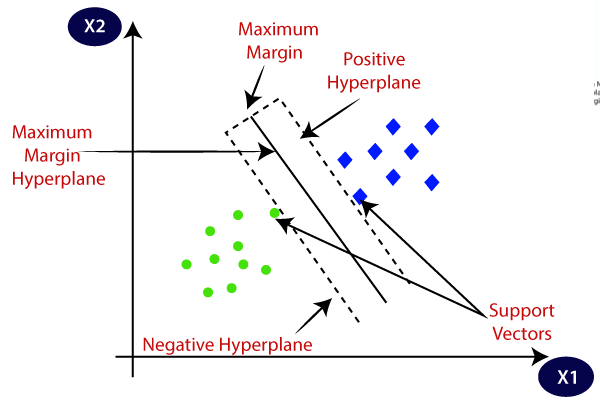

In [53]:
from IPython.display import Image
Image(filename='C:\\Users\\uttam.grade\\Downloads\\svm.png')

Support Vector Machines (SVMs in short) are supervised machine learning algorithms that are used for classification and regression purposes

# Introduction to Support Vector Machines

SVMs are one of the powerful machine learning algorithms for classification, regression and outlier detection purposes. An SVM classifier builds a model that assigns new data points to one of the given categories. Thus, it can be viewed as a non-probabilistic binary linear classifier.

SVMs can be used for linear classification purposes. In addition to performing linear classification, SVMs can efficiently perform a non-linear classification using the kernel trick. It enable us to implicitly map the inputs into high dimensional feature spaces

# Support Vector Machines intuition 

Hyperplane

A hyperplane is a decision boundary which separates between given set of data points having different class labels. The SVM classifier separates data points using a hyperplane with the maximum amount of margin. This hyperplane is known as the maximum margin hyperplane and the linear classifier it defines is known as the maximum margin classifier.

Support Vectors

Support vectors are the sample data points, which are closest to the hyperplane. These data points will define the separating line or hyperplane better by calculating margins.

Margin

A margin is a separation gap between the two lines on the closest data points. It is calculated as the perpendicular distance from the line to support vectors or closest data points. In SVMs, we try to maximize this separation gap so that we get maximum margin.

In SVMs, our main objective is to select a hyperplane with the maximum possible margin between support vectors in the given dataset. SVM searches for the maximum margin hyperplane in the following 2 step process –

Generate hyperplanes which segregates the classes in the best possible way. There are many hyperplanes that might classify the data. We should look for the best hyperplane that represents the largest separation, or margin, between the two classes.

So, we choose the hyperplane so that distance from it to the support vectors on each side is maximized. If such a hyperplane exists, it is known as the maximum margin hyperplane and the linear classifier it defines is known as a maximum margin classifier.

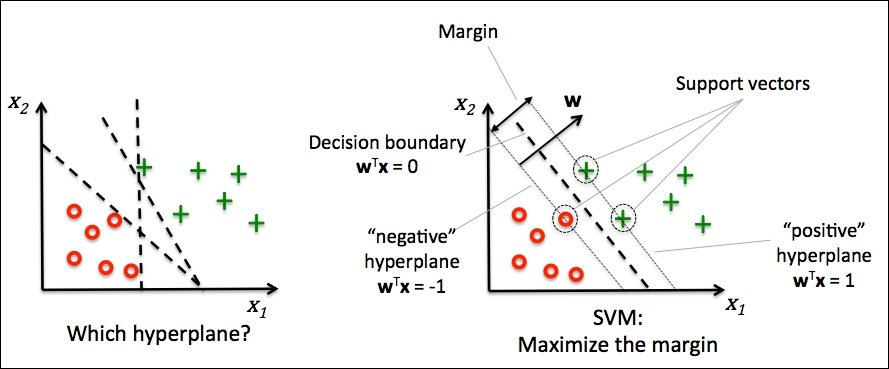

In [54]:
from IPython.display import Image
Image(filename='C:\\Users\\uttam.grade\\Downloads\\svm1.jpg')

Problem with dispersed datasets

Sometimes, the sample data points are so dispersed that it is not possible to separate them using a linear hyperplane. In such a situation, SVMs uses a kernel trick to transform the input space to a higher dimensional space as shown in the diagram below. It uses a mapping function to transform the 2-D input space into the 3-D input space. Now, we can easily segregate the data points using linear separation.

# Kernel trick - transformation of input space to higher dimensional space

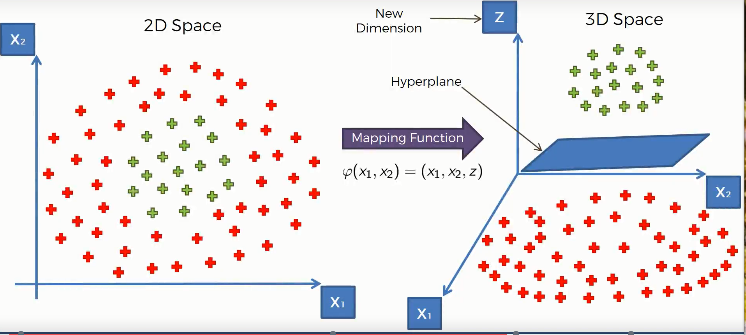

In [55]:
from IPython.display import Image
Image(filename='C:\\Users\\uttam.grade\\Downloads\\svm2.png')

# Kernel trick

In practice, SVM algorithm is implemented using a kernel. It uses a technique called the kernel trick. In simple words, a kernel is just a function that maps the data to a higher dimension where data is separable. A kernel transforms a low-dimensional input data space into a higher dimensional space. So, it converts non-linear separable problems to linear separable problems by adding more dimensions to it. Thus, the kernel trick helps us to build a more accurate classifier. Hence, it is useful in non-linear separation problems.

there are 4 popular kernels – Linear kernel,Polynomial kernel,Radial Basis Function (RBF) kernel (also called Gaussian kernel) and Sigmoid kernel

# Linear kernel



In linear kernel, the kernel function takes the form of a linear function as follows-

linear kernel : K(xi , xj ) = xiT xj

Linear kernel is used when the data is linearly separable. It means that data can be separated using a single line. It is one of the most common kernels to be used. It is mostly used when there are large number of features in a dataset. Linear kernel is often used for text classification purposes.

Training with a linear kernel is usually faster, because we only need to optimize the C regularization parameter. When training with other kernels, we also need to optimize the γ parameter. So, performing a grid search will usually take more time.

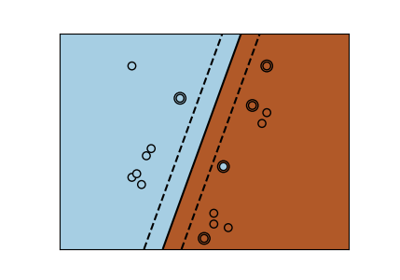

In [56]:
from IPython.display import Image
Image(filename='C:\\Users\\uttam.grade\\Downloads\\svm3.png')

# Radial Basis Function Kernel(RBF)


Radial basis function kernel is a general purpose kernel. It is used when we have no prior knowledge about the data. The RBF kernel on two samples x and y is defined by the following equation 

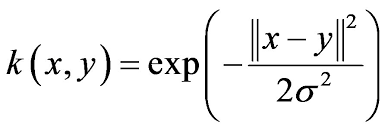

In [57]:
from IPython.display import Image
Image(filename='C:\\Users\\uttam.grade\\Downloads\\svm4.png')

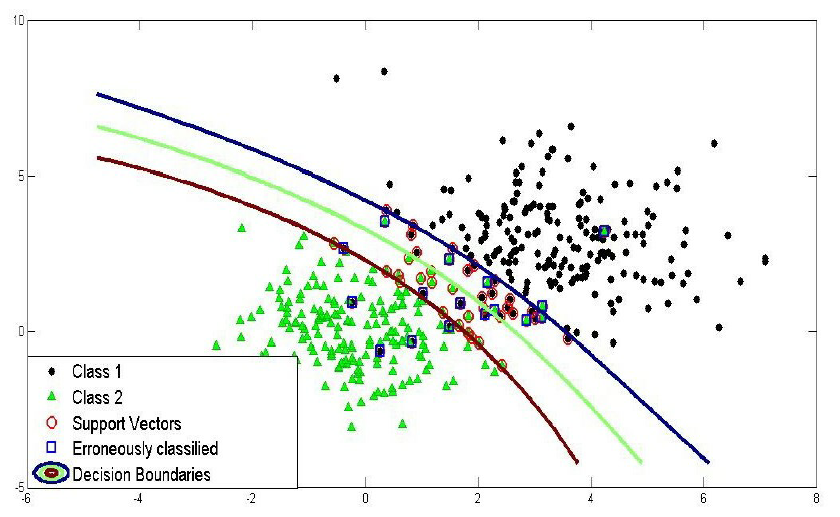

In [58]:
from IPython.display import Image
Image(filename='C:\\Users\\uttam.grade\\Downloads\\svm5.png')

In [59]:
cols = x_train_res_un.columns
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
#y_train_res_un
#x_train, x_test, y_train, y_test
x_train_res_un = scaler.fit_transform(x_train_res_un)

x_test = scaler.transform(x_test)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc=SVC() 
svc.fit(x_train_res_un,y_train_res_un)
y_pred=svc.predict(x_test)
#print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

In [ ]:
from IPython.display import Image
Image(filename='C:\\Users\\uttam.grade\\Downloads\\svm6.png')

1 What is support vectors?

2 what is Hyperplanes?

3 Marginal Distance?

4 Linear Seperable?

5 Non Linear Seperable?

In [ ]:
# Create the Hyperplane (just like in Linear Regreesion) Two margin lines having some distance (with this distance easily we can seperable the classes)

In [ ]:
############################################# Training XGBOOST Model ################################
from xgboost import XGBClassifier
params = { "objective": "multi:softmax", 'num_class': 3}
#model = xgb.XGBRegressor(**params)
# model1 = XGBClassifier(silent=False, 
#                       scale_pos_weight=1,
#                       learning_rate=0.01,  
#                       colsample_bytree = 0.4,
#                       subsample = 0.8
#                       n_estimators=1000, 
#                       reg_alpha = 0.3,
#                       max_depth=4, 
#                       gamma=10)
model1 = XGBClassifier(**params)
model1.fit(x_train_res_un, y_train_res_un)

In [ ]:
y_pred1 = model1.predict(x_test)
predictions1 = [round(value) for value in y_pred1]

In [ ]:
# from sklearn.multiclass import OneVsRestClassifier
# from sklearn.multiclass import OneVsOneClassifier

# # define the ovr strategy
# ovo = OneVsOneClassifier(model1)
# # fit model
# ovo.fit(x_train_res_un, y_train_res_un)
# # make predictions
# yhat = ovo.predict(x_test)

In [ ]:
# x_test.value_counts()

In [ ]:
from sklearn.metrics import accuracy_score
accuracy1 = accuracy_score(y_test, predictions1)
print("Accuracy 1: %.2f%%" % (accuracy1 * 100.0))

In [ ]:
cm1 = confusion_matrix(y_test, y_pred1)
print("XGBOOST Confusion Matrix", cm1)

In [ ]:
##################################### Feature Importance ##########################
feat_importances = pd.Series(model1.feature_importances_, index=x_train_res.columns)
f = pd.DataFrame(feat_importances).reset_index()#.sort_values(by='index')
f = f.rename(columns={0: "Feature_Importance", 'index': 'Feature_Name'})

In [ ]:
f['Feature_Name'].values

In [ ]:
f['Feature_Updated_Name'] = f['Feature_Name'].map({'ETHNIC_ORIGIN_American Indian or Alaskan Native': 'ETHNIC_ORIGIN',
                                                   
                                                   'ETHNIC_ORIGIN_Asian': 'ETHNIC_ORIGIN',
                                                   'ETHNIC_ORIGIN_Black or African American': 'ETHNIC_ORIGIN',
                                                   'ETHNIC_ORIGIN_Hispanic or Latino of any race': 'ETHNIC_ORIGIN',
                                                   'ETHNIC_ORIGIN_Native Hawaiian or Other Pacific': 'ETHNIC_ORIGIN',
                                                   'ETHNIC_ORIGIN_Not Applicable': 'ETHNIC_ORIGIN',
                                                   'ETHNIC_ORIGIN_Two or More Races': 'ETHNIC_ORIGIN',
                                                   'ETHNIC_ORIGIN_White': 'ETHNIC_ORIGIN'})
f_final = f[['Feature_Name','Feature_Updated_Name', 'Feature_Importance']]

In [ ]:
ax = f_final.plot(kind='barh', figsize=(15, 20), x = 'Feature_Name',
             xlabel='Feature_Name', ylabel='Feature_Importance', legend=False)

# annotate
ax.bar_label(ax.containers[0], label_type='edge')
# pad the spacing between the number and the edge of the figure
ax.margins(y=0.1)

In [ ]:
# f_final.to_excel(r'C:\\Users\\uttam.grade\\Accenture\\TJX I&D - General\\POD 2 - Performance\\ML\Uttam\\Updated\\Ethnicity_VS_Performance.xlsx', index=False)

In [ ]:
  #####################  XGBOOST Hyperparameter ###########################
    
#model2 = XGBClassifier(n_estimators=100, max_depth=8, learning_rate=0.1, subsample=0.5)
#model2.fit(x_train_res, y_train_res)
#y_pred2 = model2.predict(x_test)
#predictions2 = [round(value) for value in y_pred2]
#accuracy2 = accuracy_score(y_test, predictions2)
#print("Accuracy 2: %.2f%%" % (accuracy2 * 100.0))
#cm2 = confusion_matrix(y_test, y_pred2)
#print('CM2', cm2)
###################################################
# sorted_idx = np.argsort(model1.feature_importances_)[::-1]
# c = []
# for index in sorted_idx:
#     c.append([x_train_res.columns[index], model1.feature_importances_[index]])
# #pd.Series(model1.feature_importances_, index=x_train_res.columns).sort_values()
####################################################
# importance_type = ['weight', 'gain', 'cover', 'total_gain', 'total_cover']
#The values in the list feature_importances_ equal the values in the dict get_score(importance_type='weight') where each element is divided by the sum of elements.
####################################################
# fig, ax = plt.subplots(figsize=(12,18))
# f_final.plot(kind = 'barh', x = 'Feature_Name', y = "Feature_Importance", color = 'red', ax=ax)
# plt.show()
#####################################################
# importance_type
# ‘weight’ - the number of times a feature is used to split the data across all trees.
# ‘gain’ - the average gain across all splits the feature is used in.
# ‘cover’ - the average coverage across all splits the feature is used in.
# ‘total_gain’ - the total gain across all splits the feature is used in.
# ‘total_cover’ - the total coverage across all splits the feature is used in.
#Information gain helps to determine the order of attributes in the nodes of a decision tree. 
#information gain to determine how good the splitting of nodes in a decision tree.
######################################################
# from sklearn.tree import DecisionTreeClassifier
# dtree_model = DecisionTreeClassifier(max_depth = 60).fit(x_train_res_un, y_train_res_un)
# dtree_predictions = dtree_model.predict(x_test)
#####################################################
# predictions = [round(value) for value in dtree_predictions]
# accuracy = accuracy_score(y_test, predictions)
# print("Accuracy: %.2f%%" % (accuracy * 100.0))
#######################################################
# cm = confusion_matrix(y_test, dtree_predictions)
# cm

In [ ]:
#A confusion matrix is a summary of prediction results on a classification problem. The number of correct and incorrect predictions are summarized with count values and broken down by each class. This is the key to the confusion matrix.

In [ ]:
###################################### Training Random Forest Model #############################
import time
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 200 decision trees
rf = RandomForestClassifier(n_estimators = 200, random_state = 42)
start = time.time()
# Train the model on training data
rf.fit(x_train_res_un, y_train_res_un)
stop = time.time()
print(f"Training time: {stop - start}s")

In [ ]:
# Use the forest's predict method on the test data
predictions = rf.predict(x_test)
predictions_rf = [round(value) for value in predictions]

In [ ]:
accuracy = accuracy_score(y_test, predictions_rf)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [ ]:
# creating a confusion matrix
cm = confusion_matrix(y_test, predictions)
cm

In [ ]:
############################################# Feature Importance #########################
feat_importances_rf = pd.Series(rf.feature_importances_, index=x_train_res.columns)
f_rf = pd.DataFrame(feat_importances_rf).reset_index()#.sort_values(by='index')
f_rf = f_rf.rename(columns={0: "Feature_Importance", 'index': 'Feature_Name'})

In [ ]:
f_rf['Feature_Updated_Name'] = f_rf['Feature_Name'].map({'ETHNIC_ORIGIN_American Indian or Alaskan Native': 'ETHNIC_ORIGIN',
                                                   
                                                   'ETHNIC_ORIGIN_Asian': 'ETHNIC_ORIGIN',
                                                   'ETHNIC_ORIGIN_Black or African American': 'ETHNIC_ORIGIN',
                                                   'ETHNIC_ORIGIN_Hispanic or Latino of any race': 'ETHNIC_ORIGIN',
                                                   'ETHNIC_ORIGIN_Native Hawaiian or Other Pacific': 'ETHNIC_ORIGIN',
                                                   'ETHNIC_ORIGIN_Not Applicable': 'ETHNIC_ORIGIN',
                                                   'ETHNIC_ORIGIN_Two or More Races': 'ETHNIC_ORIGIN',
                                                   'ETHNIC_ORIGIN_White': 'ETHNIC_ORIGIN'})
f_rf_final = f_rf[['Feature_Name','Feature_Updated_Name', 'Feature_Importance']]

In [ ]:
ax = f_rf_final.plot(kind='barh', figsize=(15, 20), x = 'Feature_Name',
             xlabel='Feature_Name', ylabel='Feature_Importance', legend=False)

# annotate
ax.bar_label(ax.containers[0], label_type='edge')
# pad the spacing between the number and the edge of the figure
ax.margins(y=0.1)


In [ ]:
import xlwt
from xlwt.Workbook import *
from pandas import ExcelWriter
import xlsxwriter
wb= Workbook()
writer = pd.ExcelWriter(r'C:\\Users\\uttam.grade\\Accenture\\TJX I&D - General\\POD 2 - Performance\\ML\\Uttam\\Updated\\Variable_Importance_Final_Uttam_Ethinicity_VS_Performance.xlsx', engine = 'xlsxwriter')

ws1 = wb.add_sheet('XGBOOST')
ws2 = wb.add_sheet('RandomForest')
f_final.to_excel(writer,'XGBOOST', index=False)
f_rf_final.to_excel(writer,'RandomForest', index=False)
writer.save()
writer.close()

In [ ]:
# # LightGBM
# import lightgbm as lgb
# clf = lgb.LGBMClassifier()
# clf.fit(x_train, y_train) 

In [ ]:
# y_pred=clf.predict(x_test)
# predictions = [round(value) for value in y_pred]
# accuracy = accuracy_score(y_test, predictions)
# print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [ ]:
# # Hyper Parameter
# import lightgbm as lgb
# fit_params={"early_stopping_rounds":30, 
#             "eval_metric" : 'auc', 
#             "eval_set" : [(x_test,y_test)],
#             'eval_names': ['valid'],
#             #'callbacks': [lgb.reset_parameter(learning_rate=learning_rate_010_decay_power_099)],
#             'verbose': 100,
#             'categorical_feature': 'auto'}

In [ ]:
# from scipy.stats import randint as sp_randint
# from scipy.stats import uniform as sp_uniform
# param_test ={'num_leaves': sp_randint(6, 50), 
#              'min_child_samples': sp_randint(100, 500), 
#              'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
#              'subsample': sp_uniform(loc=0.2, scale=0.8), 
#              'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
#              'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
#              'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}

In [ ]:
# n_HP_points_to_test = 100

# import lightgbm as lgb
# from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# #n_estimators is set to a "large value". The actual number of trees build will depend on early stopping and 5000 define only the absolute maximum
# clf = lgb.LGBMClassifier(max_depth=-1, random_state=314, silent=True, metric='None', n_jobs=4, n_estimators=5000)
# gs = RandomizedSearchCV(
#     estimator=clf, param_distributions=param_test, 
#     n_iter=n_HP_points_to_test,
#     scoring='roc_auc',
#     cv=3,
#     refit=True,
#     random_state=314,
#     verbose=True)

In [ ]:
# gs.fit(x_train, y_train, **fit_params)
# print('Best score reached: {} with params: {} '.format(gs.best_score_, gs.best_params_))

In [ ]:
# opt_parameters = {'colsample_bytree': 0.9234, 'min_child_samples': 399, 'min_child_weight': 0.1, 'num_leaves': 13, 'reg_alpha': 2, 'reg_lambda': 5, 'subsample': 0.855}

In [ ]:
# clf_sw = lgb.LGBMClassifier(**clf.get_params())
# #set optimal parameters
# clf_sw.set_params(**opt_parameters)


In [ ]:
# gs_sample_weight = GridSearchCV(estimator=clf_sw, 
#                                 param_grid={'scale_pos_weight':[1,2,6,12]},
#                                 scoring='roc_auc',
#                                 cv=5,
#                                 refit=True,
#                                 verbose=True)